# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import PercentFormatter


df = pd.read_csv('sinasc_RO_2019.csv')
df['CONSULTAS']

0        4
1        4
2        4
3        3
4        4
        ..
27023    4
27024    4
27025    4
27026    4
27027    4
Name: CONSULTAS, Length: 27028, dtype: int64

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

Irei categorizar a variavel qualitativa 'GESTACAO' para mais facil leitura do grafico:

In [16]:
#criando um DataFrame com as semanas e quantidades por categoria 
data = {
    'Gestação': ['37 a 41 semanas', '32 a 36 semanas', '42 semanas e mais', 
                 '28 a 31 semanas', '22 a 27 semanas', 'Menos de 22 semanas'],
    'Quantidade': [22523, 2234, 698, 162, 85, 7]
}
sinasc_df_gestacao = pd.DataFrame(df)

#Mapeamento das categorias para valores médios de semana (média ponderada das semanas)
mapa_gestacao = {
    '37 a 41 semanas': 39,
    '32 a 36 semanas': 34,
    '42 semanas e mais': 42,
    '28 a 31 semanas': 29.5,
    '22 a 27 semanas': 24.5,
    'Menos de 22 semanas': 21
}

#criando uma coluna nova com os valores no DataFrame raiz 
df['GESTACAOVALORES'] = df['GESTACAO'].map(mapa_gestacao)

0        5.0
1        2.0
2        9.0
3        5.0
4        2.0
        ... 
27023    2.0
27024    1.0
27025    2.0
27026    2.0
27027    5.0
Name: ESTCIVMAE, Length: 27028, dtype: float64

Irei categorizar a variavel qualitativa 'ESTCIVMAE' para mais facil leitura do grafico:

In [32]:
#Mapeamento das categorias para valores médios de semana (média ponderada das semanas)
mapa_est_civ_mae = {
    1.0:'Solteira',
    2.0: 'Casada',
    3.0: 'Viúva',
    4.0: 'Separada',
    9.0: 'Ignorada'
}

#criando uma coluna nova com os valores no DataFrame raiz 
df['ESTCIVMAE_TXT'] = df['ESTCIVMAE'].map(mapa_est_civ_mae)

#deletando NaN
df.dropna(subset = ['ESTCIVMAE_TXT'], inplace = True)
df['ESTCIVMAE_TXT']

1          Casada
2        Ignorada
4          Casada
6        Solteira
7          Casada
           ...   
27022      Casada
27023      Casada
27024    Solteira
27025      Casada
27026      Casada
Name: ESTCIVMAE_TXT, Length: 19531, dtype: object

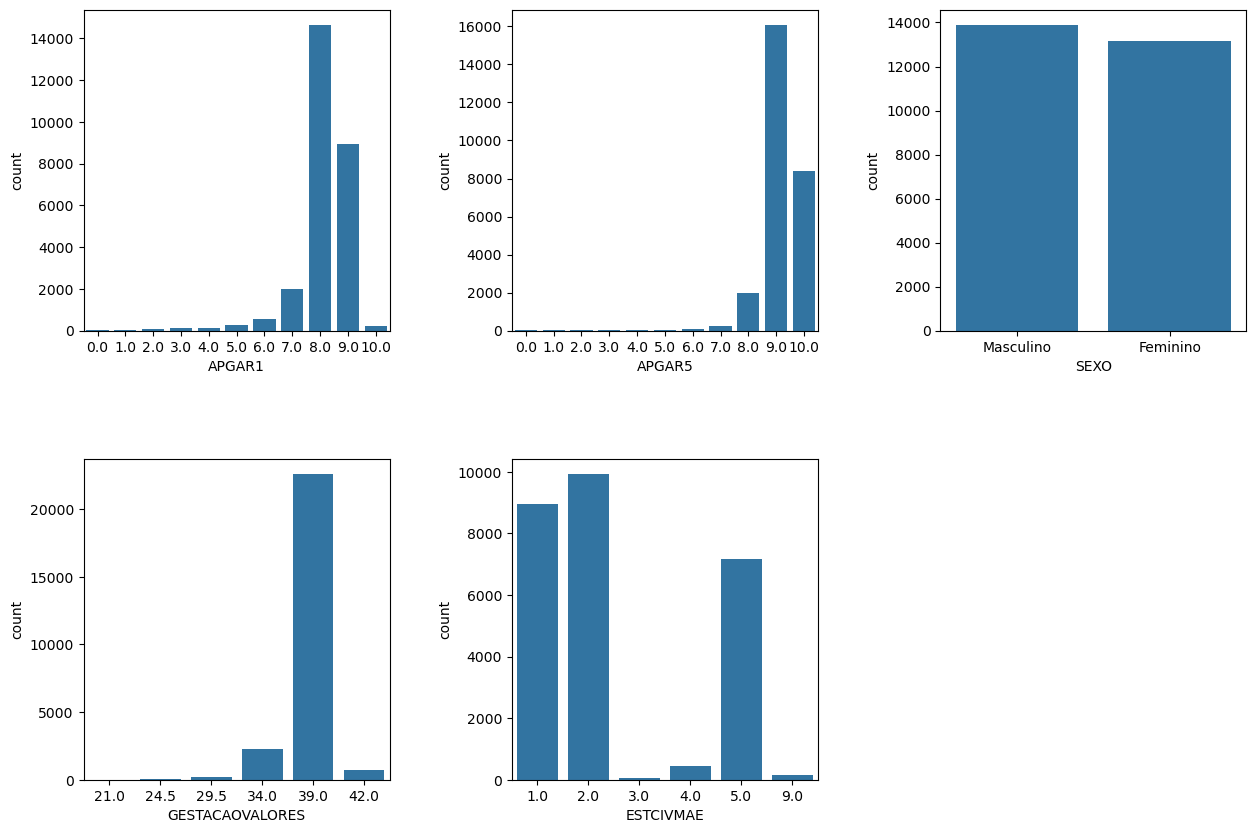

In [3]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# grafico 1
sns.countplot(ax=axes[0,0], x = 'APGAR1', data=df)

# grafico 2 
sns.countplot(ax = axes[0, 1], x = 'APGAR5', data=df)

# grafico 3
sns.countplot(ax = axes[0, 2], x = 'SEXO', data=df)

# grafico 4 
sns.countplot(ax=axes[1, 0], x = 'GESTACAOVALORES', data=df)

# grafico 5
sns.countplot(ax=axes[1, 1], x='ESTCIVMAE', data=df)

# grafico oculto
axes[1, 2].set_visible(False)

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

<Axes: xlabel='APGAR5', ylabel='CONSULTAS'>

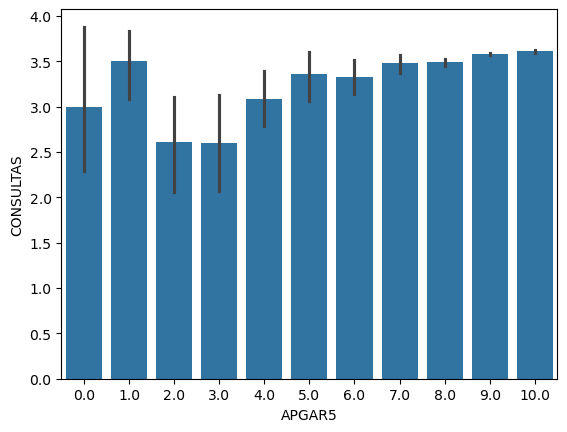

In [4]:
# barplot com a média no y
sns.barplot(x = 'APGAR5', y = 'CONSULTAS', data=df)

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

Text(0.5, 0, '')

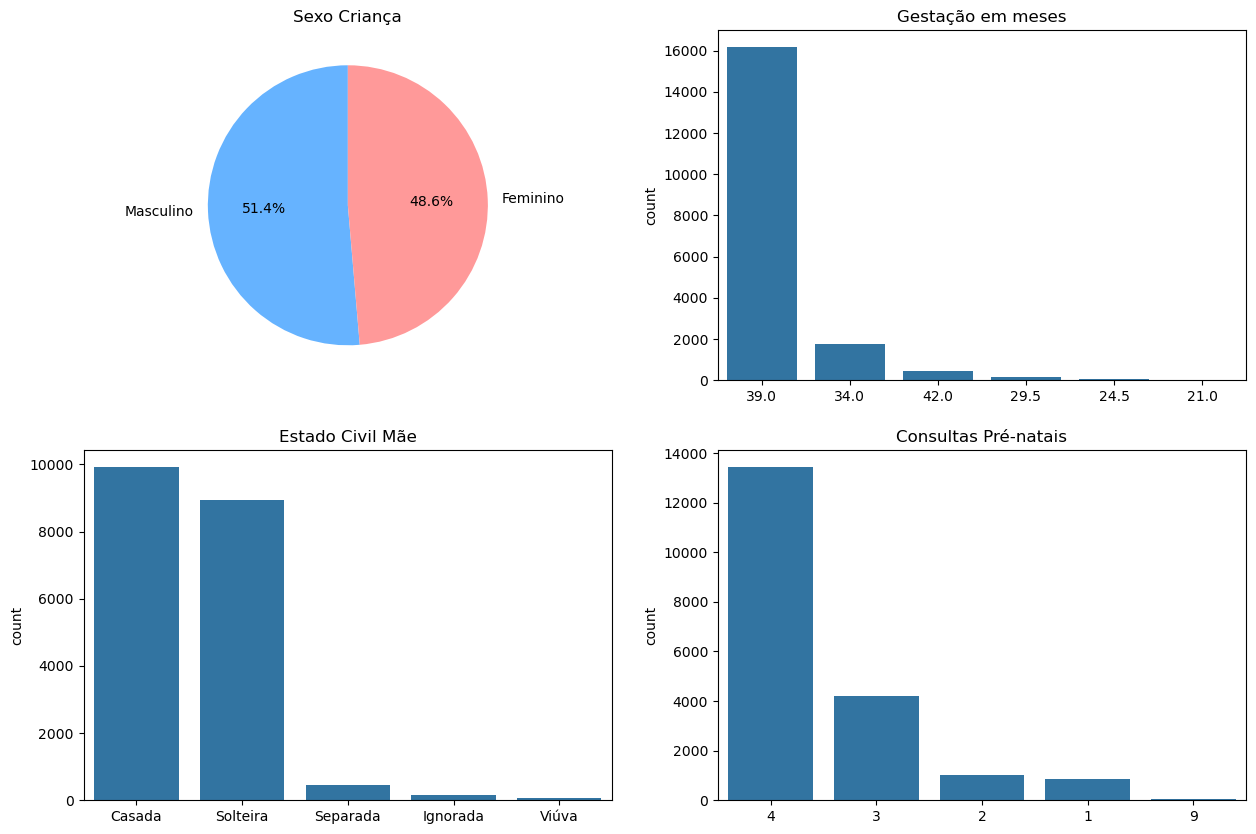

In [43]:
fig, axes = plt.subplots(2,2, figsize=(15,10))

# criando um grafico de PIZZA para a variavel categorica 
df_sexo = df['SEXO'].value_counts()
df_sexo.plot.pie(ax=axes[0,0], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
# removendo label
axes[0,0].set_ylabel('')
axes[0,0].set_title('Sexo Criança')

# ordenando os numeros
order_gestacao = df['GESTACAOVALORES'].value_counts().index
sns.countplot(ax=axes[0, 1], x = 'GESTACAOVALORES', data=df, order = order_gestacao)
axes[0,1].set_title('Gestação em meses')
axes[0,1].set_xlabel('')

# ordenando os numeros
order_mae = df['ESTCIVMAE_TXT'].value_counts().index
sns.countplot(ax=axes[1,0], x = 'ESTCIVMAE_TXT', data=df, order=order_mae)
axes[1,0].set_title('Estado Civil Mãe')
axes[1,0].set_xlabel('')

order_consultas = df['CONSULTAS'].value_counts().index
sns.countplot(ax=axes[1,1], x = 'CONSULTAS', data=df, order=order_consultas)
axes[1,1].set_title('Consultas Pré-natais')
axes[1,1].set_xlabel('')
